# 未分类数据集的手写字体识别

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv(r'D:\大四上\机器学习\作业 12.31\archive\mnist_train.csv')
print('训练集维度：',train.shape)

训练集维度： (60000, 785)


In [2]:
train_images=train.drop(columns=['label'],axis=1)
train_labels=train['label']

In [3]:
test = pd.read_csv(r'D:\大四上\机器学习\作业 12.31\archive\mnist_test.csv')
print('训练集维度：',test.shape)

训练集维度： (10000, 785)


In [4]:
test_images=test.drop(columns=['label'],axis=1)
test_labels=test['label']

In [5]:
train_images = train_images.values.reshape(-1, 28, 28)
test_images = test_images.values.reshape(-1, 28, 28)


In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
import tensorflow as tf
from keras import datasets, layers, models  # 这里keras版本是2.8.0
import matplotlib.pyplot as plt

In [9]:
 # 设置采用GPU训练程序
gpus = tf.config.list_physical_devices("GPU") 
if gpus: 
    gpu0 = gpus[0] 
    tf.config.experimental.set_memory_growth(gpu0, True) 
    tf.config.set_visible_devices([gpu0], "GPU")  

In [10]:
# 归一化:将像素的值标准化至0到1的区间内,rgb像素值 0~255 0为黑 1为白
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
# 构建CNN网络模型
model = models.Sequential([  
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  
 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  
    
    layers.Flatten(),  
    layers.Dense(64, activation='relu'), 
    layers.Dense(10) 
])
# 打印网络结构
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 64)                │    102,464 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 10)                │        650 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 编译
model.compile(optimizer='adam',  
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 设置损失函数 from_logits: 为True时，会将y_pred转化为概率
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
# 训练10轮

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9731 - loss: 0.0871 - val_accuracy: 0.9862 - val_loss: 0.0460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9884 - loss: 0.0387 - val_accuracy: 0.9890 - val_loss: 0.0313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9888 - val_loss: 0.0394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9957 - loss: 0.0157 - val_accuracy: 0.9910 - val_loss: 0.0283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9907 - val_loss: 0.0302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9974 - loss: 0.0078 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9971 -

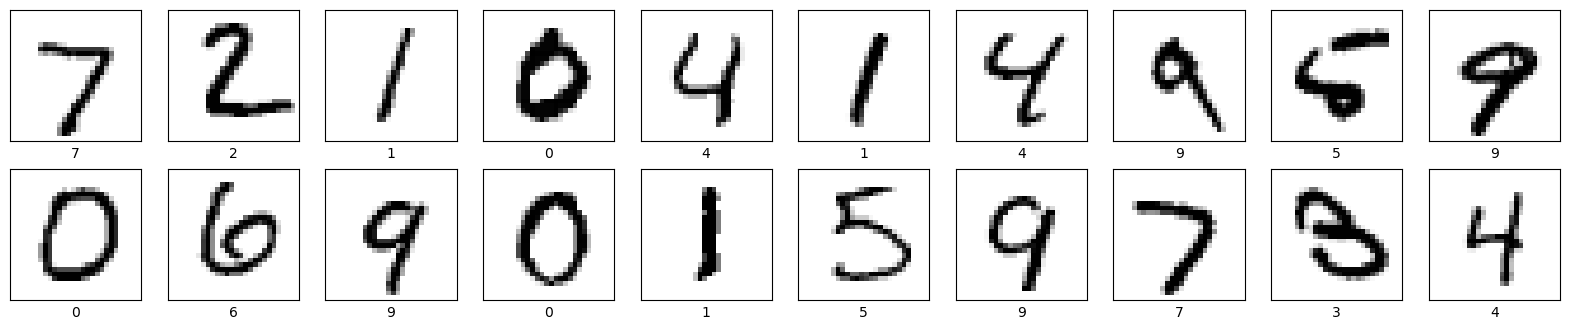

In [19]:
# 绘制测试集图片
plt.figure(figsize=(20, 10)) 
for i in range(20):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

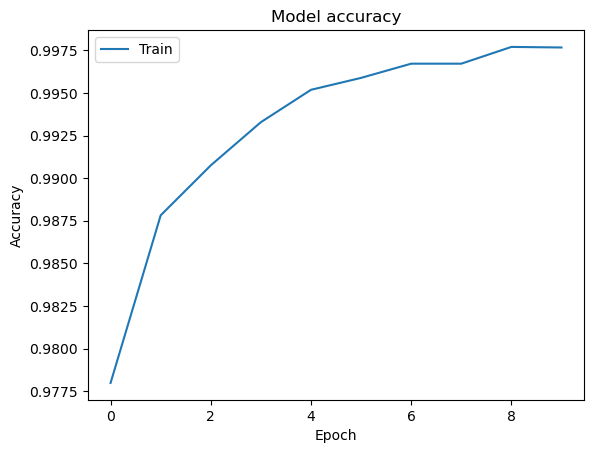

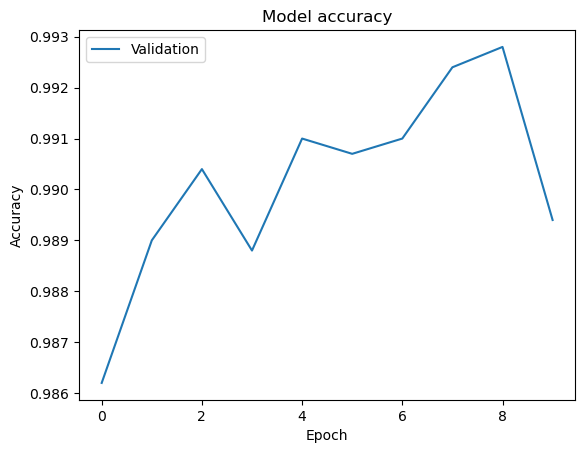

In [16]:
import matplotlib.pyplot as plt

# 绘制训练集的准确率曲线
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# 绘制验证集的准确率曲线
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()


# 分类数据集的手写字体识别

In [27]:
accuracy_list = []
val_accuracy_list = []

for i in range(5):
    # 读取训练数据
    train = pd.read_csv(r'D:\大四上\机器学习\作业 12.31\archive\train_image_{}.csv'.format(i))
    train_images = train.drop(columns=['label'], axis=1)
    train_labels = train['label']

    # 读取测试数据
    test = pd.read_csv(r'D:\大四上\机器学习\作业 12.31\archive\test_image_{}.csv'.format(i))
    test_images = test.drop(columns=['label'], axis=1)
    test_labels = test['label']
    # 将数据重塑为模型期望的形状
    train_images = train_images.values.reshape(-1, 28, 28)
    test_images = test_images.values.reshape(-1, 28, 28)

    # 训练模型
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

    # 将准确率添加到列表中
    accuracy_list.append(history.history['accuracy'])
    val_accuracy_list.append(history.history['val_accuracy'])


Epoch 1/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9810 - loss: 12.8071 - val_accuracy: 0.9725 - val_loss: 12.6040
Epoch 2/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.9963 - loss: 0.6085 - val_accuracy: 0.9786 - val_loss: 10.4279
Epoch 3/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9973 - loss: 0.2793 - val_accuracy: 0.9786 - val_loss: 9.6136
Epoch 4/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9979 - loss: 0.1709 - val_accuracy: 0.9740 - val_loss: 9.0468
Epoch 5/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9998 - loss: 0.0113 - val_accuracy: 0.9725 - val_loss: 8.9855
Epoch 6/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9990 - loss: 0.0117 - val_accuracy: 0.9771 - val_loss: 7.9113
Epoch 7/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9994 - loss: 0.0334 - val_accuracy: 0.9740 - val_loss: 8.6599
Epoch 8/10
287/287 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9998 - loss: 0.0180

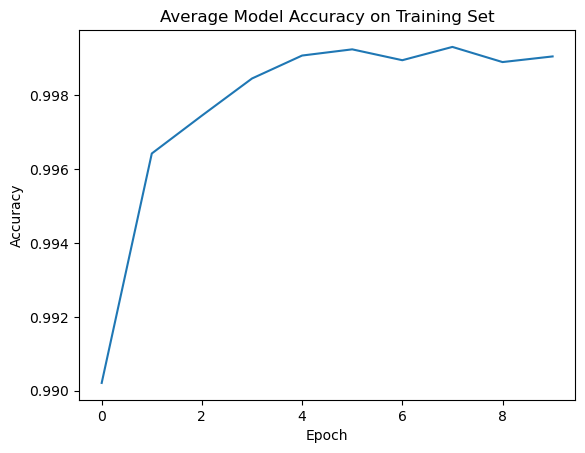

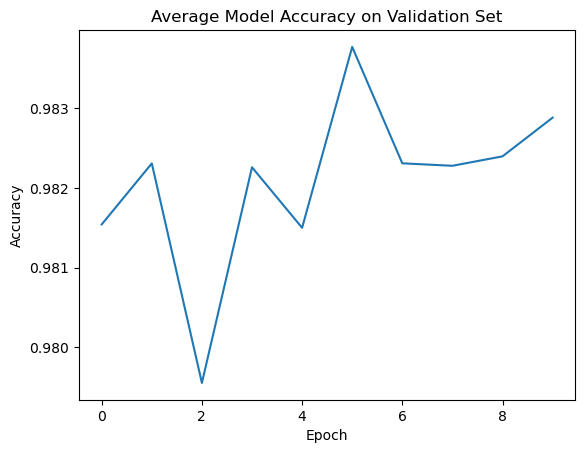

In [28]:
# 计算平均准确率
avg_accuracy = np.mean(accuracy_list, axis=0)
avg_val_accuracy = np.mean(val_accuracy_list, axis=0)

# 绘制训练集的平均准确率曲线
plt.plot(avg_accuracy)
plt.title('Average Model Accuracy on Training Set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# 绘制验证集的平均准确率曲线
plt.plot(avg_val_accuracy)
plt.title('Average Model Accuracy on Validation Set')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


结论：分类后的数据集虽然对训练集上拟合效果更优，但是没有在测试集的预测效果上表现得更好